In [1]:
# Setup plotting environment
%matplotlib inline
import matplotlib.pyplot as plt
# use seaborn for nice default plot settings
import seaborn; seaborn.set_style('ticks')

In [2]:
# Importing manupulation packages
import numpy as np
# Reproducible results
np.random.seed(12345)
import scipy.stats as stat

In [65]:
# Generating fake data
def lin_law(t, a, b):
    return a * t + b 


def generate_data(params, N):
    

    t = np.arange(-5, 5, 0.01)
    y = np.zeros([N, len(t)])
    yerr = y.copy()
    for n in range(N):
        a, b = params[n].ravel()
        y[n] = lin_law(t, a, b)
        yerr[n] = 0.5
        y[n] += yerr[n] * np.random.randn(len(t))
    return t, y, yerr

n_sets = 1

mu_a, sigma_a = 1, 0.2 # mean and standard deviation
a = np.random.normal(mu_a, sigma_a, n_sets)

mu_b, sigma_b = -2, 2 # mean and standard deviation
b = np.random.normal(mu_b, sigma_b, n_sets)

parameters = np.array([a, b]).transpose()

t, y, yerr = generate_data(parameters, n_sets)

1000
1000
[ 0.99561338 -0.21109329]


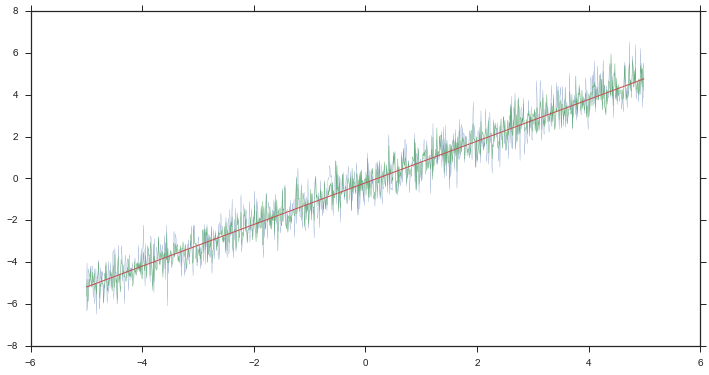

In [84]:
fig, ax = plt.subplots(1, figsize=(12,6), dpi=2400)
from scipy.optimize import curve_fit


n_resamples = 1
for n in range(n_resamples):
    
    y_resamp = (y + yerr * np.random.randn(len(t))).ravel()
    print(len(t))
    print(len(y_resamp))
    popt, pcov = curve_fit(lin_law, t, y_resamp)
    print(popt)
    ax.plot(t, y_resamp, lw=0.2)
    ax.plot(t, y.ravel(), lw=0.4)
    
    ax.plot(t, lin_law(t, *popt), lw=1)